In [10]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
results_dir_1 = "../run/results/tabula_rasa_1"
results_dir_2 = "../run/results/tabula_rasa_2"
results_dir_3 = "../run/results/tabula_rasa_3"
results_dir_4 = "../run/results/tabula_rasa_4"

In [12]:
df_1 = pd.read_csv(os.path.join(results_dir_1, "ode_log.csv"))
df_2 = pd.read_csv(os.path.join(results_dir_2, "ode_log.csv"))
df_3 = pd.read_csv(os.path.join(results_dir_3, "ode_log.csv"))
# df_4 = pd.read_csv(os.path.join(results_dir_4, "ode_log.csv"))

<ipython-input-42-f7e56ddc9520>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


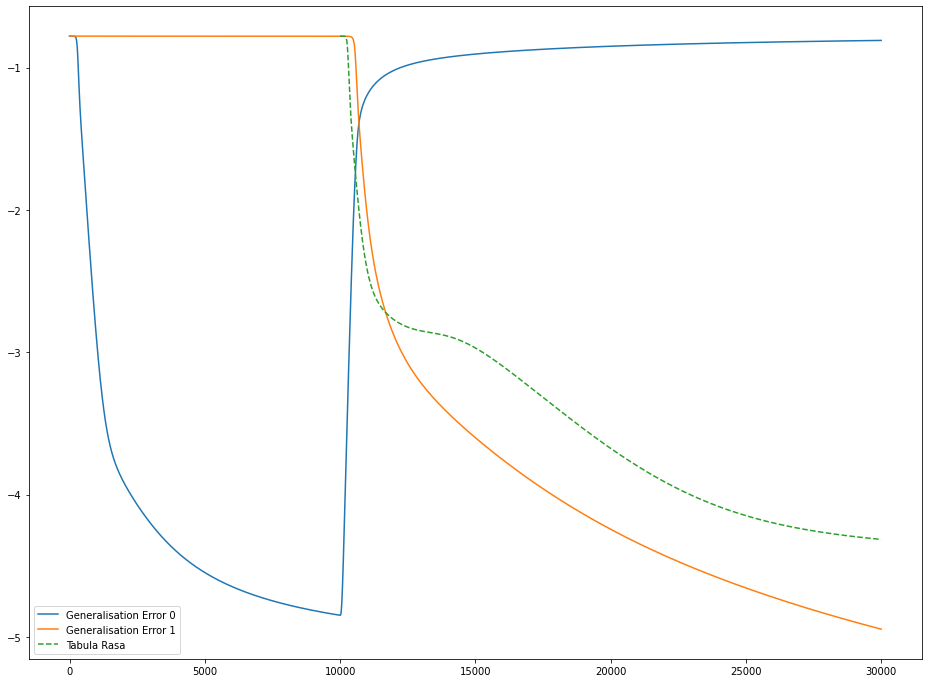

In [42]:
fig = plt.figure(figsize=(16,12))
error_0_1 = df_1.log_generalisation_error_0
error_1_1 = df_1.log_generalisation_error_1
error_1_3 = df_3.log_generalisation_error_1
# error_1_4 = df_4.log_generalisation_error_1
plt.plot(range(len(error_0_1)), error_0_1, label="Generalisation Error 0")
plt.plot(range(len(error_1_1)), error_1_1, label="Generalisation Error 1")
plt.plot(range(10000, 30000), error_1_3[:20000], linestyle="dashed", label="Tabula Rasa")
# plt.plot(range(10000, 30000), error_1_4[:20000], linestyle="dashed", label="Tabula Rasa 2")
plt.legend()
fig.show()
fig.savefig("./tabula_rasa_single.pdf")

<ipython-input-37-277a2c3afb0f>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


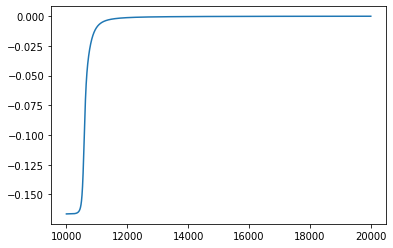

In [37]:
fig = plt.figure()
transfer = df_3.generalisation_error_1[:20000] - df_1.generalisation_error_1[10000:]
plt.plot(range(len(transfer)), transfer)
fig.show()

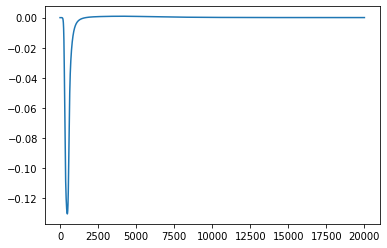

In [38]:
fig = plt.figure()
transfer = np.array(df_3.generalisation_error_1[:20000]) - np.array(df_1.generalisation_error_1[10001:])
plt.plot(range(len(transfer)), transfer)

In [39]:
transfer

array([-1.55234243e-06, -9.53278502e-07, -3.90231945e-07, ...,
        3.70875637e-05,  3.70868625e-05,  3.70861617e-05])

In [108]:
feature_no_pretrain_dir = "../run/results/tabula_rasa_feature_similarity/"
feature_pretrain_dir = "../run/results/tabula_rasa_feature_similarity_both/"

In [109]:
feature_no_pretrain_dfs = {f: pd.read_csv(os.path.join(feature_no_pretrain_dir, f"feature_{f}", "0", "ode_log.csv")) for f in np.linspace(0, 1, 11)}
feature_pretrain_dfs = {f: pd.read_csv(os.path.join(feature_pretrain_dir, f"feature_{f}", "0", "ode_log.csv")) for f in np.linspace(0, 1, 11)}

In [145]:
def cross_section_fig(t):
    transfers = []
    for f, df in feature_pretrain_dfs.items():
        gen_error_1 = np.array(df.generalisation_error_1)
        print(gen_error_1[10000])
        transfer_at_t = gen_error_1[10000] - gen_error_1[10000 + t]
        transfers.append((f, transfer_at_t))
    fig = plt.figure()
    plt.scatter([t[0] for t in transfers], [t[1] for t in transfers])
    fig.show()

0.1666682481230153
0.1664921830287797
0.1662958575782904
0.1660833468419528
0.1658593938825848
0.1656292175263125
0.1653996168037025
0.1651803307880243
0.1649880648117671
0.1648611749976117
0.1651408004167402


<ipython-input-145-c9b3c99df2d4>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


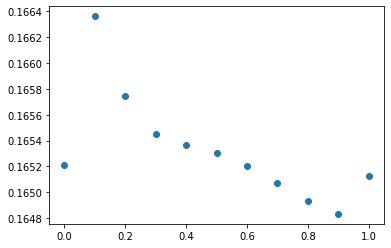

In [146]:
cross_section_fig(4000)

In [143]:
def cross_section_fig_alternate(t):
    transfers = []
    for f, df in feature_pretrain_dfs.items():
        gen_error_1 = np.array(df.generalisation_error_1)
        # list(feature_pretrain_dfs.keys())[0]
        gen_error_1_no_pretrain = np.array(feature_no_pretrain_dfs[f].generalisation_error_1)
        transfer_at_t = gen_error_1_no_pretrain[t] - gen_error_1[10000 + t]
        transfers.append((f, transfer_at_t))
    fig = plt.figure()
    plt.scatter([t[0] for t in transfers], [t[1] for t in transfers])
    fig.show()

<ipython-input-143-9599544eb604>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


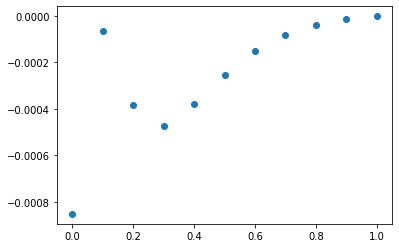

In [144]:
cross_section_fig_alternate(5000)

<ipython-input-130-ecc24af7b8d5>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


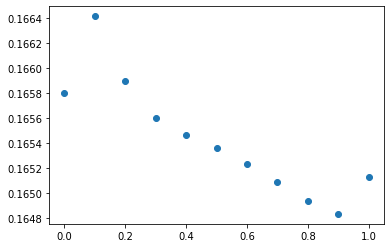

In [135]:
cross_section_fig(5000)